In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

In [30]:
data = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/ds-regression-project-2-main/ds-regression-project-2-main/data/COVID19_Qc_RapportINSPQ_HistoVigie.csv")
df = data.copy()
df

,Date,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Deces_Cumulatif_CHCHSLD,Nb_Deces_Cumulatif_RPA,Nb_Deces_Cumulatif_DomInc,Nb_Deces_Cumulatif_Autre,Nb_Nvx_Deces_Total,Nb_Nvx_Deces_CHCHSLD,Nb_Nvx_Deces_RPA,Nb_Nvx_Deces_DomInc,Nb_Nvx_Deces_Autre
0,Date inconnue,0,0,0,0,0,0,0,100,10,20,65,5
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2023-01-02,1286460,794,17618,6816,3397,6639,766,2,0,0,2,0
1077,2023-01-03,1287392,932,17623,6818,3398,6641,766,5,2,1,2,0
1078,2023-01-04,1288487,1095,17628,6819,3399,6644,766,5,1,1,3,0
1079,2023-01-05,1289368,881,17637,6820,3400,6650,767,9,1,1,6,1


In [3]:
df.drop(0, inplace=True)
df.reset_index()
df = df[['Date','Nb_Nvx_Cas']]
df['index_col'] = df.reset_index().index
df = df.rename(columns={'Nb_Nvx_Cas': 'num_cases'})
df = df.rename(columns={'Date': 'date'})
df

,date,num_cases,index_col
1,2020-01-23,0,0
2,2020-01-24,0,1
3,2020-01-25,0,2
4,2020-01-26,0,3
5,2020-01-27,0,4
...,...,...,...
1076,2023-01-02,794,1075
1077,2023-01-03,932,1076
1078,2023-01-04,1095,1077
1079,2023-01-05,881,1078


In [4]:
truncated_df = df.loc[(df['index_col']>=37) & (df['index_col']<=76)]
truncated_df['index_col'] = truncated_df.reset_index().index
truncated_df['treated'] = truncated_df['index_col'].apply(lambda row: row>19)
truncated_df['treated'] = truncated_df['treated'].apply(lambda row: int(row))
truncated_df

,date,num_cases,index_col,treated
38,2020-02-29,0,0,0
39,2020-03-01,0,1,0
40,2020-03-02,0,2,0
41,2020-03-03,0,3,0
42,2020-03-04,0,4,0
43,2020-03-05,0,5,0
44,2020-03-06,1,6,0
45,2020-03-07,0,7,0
46,2020-03-08,0,8,0
47,2020-03-09,0,9,0


In [5]:
untreated_df = truncated_df[truncated_df['treated']==0]
print(f"The number of samples before the lockdown is {len(untreated_df)}.")
untreated_df

The number of samples before the lockdown is 20.


,date,num_cases,index_col,treated
38,2020-02-29,0,0,0
39,2020-03-01,0,1,0
40,2020-03-02,0,2,0
41,2020-03-03,0,3,0
42,2020-03-04,0,4,0
43,2020-03-05,0,5,0
44,2020-03-06,1,6,0
45,2020-03-07,0,7,0
46,2020-03-08,0,8,0
47,2020-03-09,0,9,0


In [6]:
treated_df = truncated_df[truncated_df['treated']==1]
# treated_df['new_index_col'] = treated_df.reset_index().index
print(f"The number of samples after the lockdown is {len(treated_df)}.")
treated_df

The number of samples after the lockdown is 20.


,date,num_cases,index_col,treated
58,2020-03-20,75,20,1
59,2020-03-21,139,21,1
60,2020-03-22,171,22,1
61,2020-03-23,258,23,1
62,2020-03-24,220,24,1
63,2020-03-25,249,25,1
64,2020-03-26,344,26,1
65,2020-03-27,433,27,1
66,2020-03-28,405,28,1
67,2020-03-29,500,29,1


### Linear regression for  pre-lockdown cases

In [46]:
X = untreated_df['index_col']
X = sm.add_constant(X)
y = untreated_df['num_cases']
est = sm.OLS(y,X).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     6.332
Date:                Tue, 10 Jan 2023   Prob (F-statistic):             0.0216
Time:                        10:40:25   Log-Likelihood:                -72.140
No. Observations:                  20   AIC:                             148.3
Df Residuals:                      18   BIC:                             150.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0143      4.051     -1.238      0.232     -13.525       3.497
index_col      0.9173      0.365      2.516      0.022       0.151       1.683
==============================================================================
Omnibus:                       38.830   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.097
Skew:                           3.090   Prob(JB):                     7.51e-25
Kurtosis:                      12.753   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

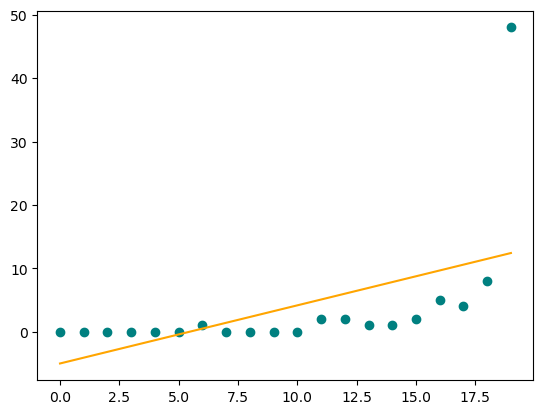

In [47]:
Xfit = untreated_df['index_col']
Xfit = sm.add_constant(Xfit)
yfit = est.predict(Xfit)
Xfit = np.squeeze(np.asarray(Xfit))
X = np.squeeze(np.asarray(X))
plt.scatter(X[:,1],y,color='teal')
plt.plot(Xfit[:,1],yfit,c='orange')
plt.show()

### Polynomial regression for  pre-lockdown cases

In [48]:
X1 = untreated_df['index_col']
X1 = sm.add_constant(X1)
X1 = np.squeeze(np.asarray(X1))
X1 = np.concatenate([X1, np.square(X1[:,1]).reshape(20,1)],axis=1)
y1 = untreated_df['num_cases']
est = sm.OLS(y1,X1).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     8.497
Date:                Tue, 10 Jan 2023   Prob (F-statistic):            0.00277
Time:                        10:40:29   Log-Likelihood:                -68.225
No. Observations:                  20   AIC:                             142.4
Df Residuals:                      17   BIC:                             145.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7519      4.843      0.981      0.340      -5.465      14.969
x1            -2.3381      1.181     -1.979      0.064      -4.831       0.154
x2             0.1713      0.060      2.855      0.011       0.045       0.298
==============================================================================
Omnibus:                       22.061   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.446
Skew:                           1.834   Prob(JB):                     5.46e-08
Kurtosis:                       8.165   Cond. No.                         467.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

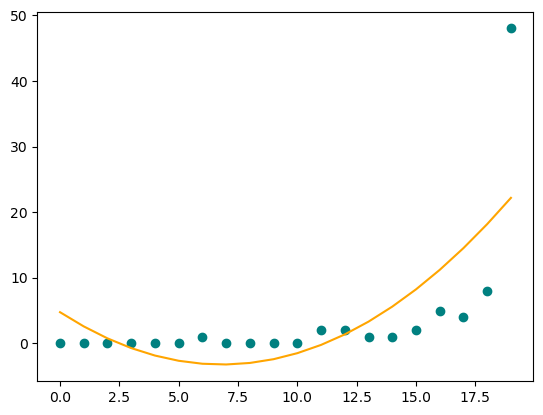

In [49]:
Xfit1 = untreated_df['index_col']
Xfit1 = sm.add_constant(Xfit1)
Xfit1 = np.squeeze(np.asarray(Xfit1))
Xfit1 = np.concatenate([Xfit1, np.square(Xfit1[:,1]).reshape(20,1)],axis=1)
yfit1 = est.predict(Xfit1)
X1 = np.squeeze(np.asarray(X1))
plt.scatter(X1[:,1],y1,color='teal')
plt.plot(Xfit1[:,1],yfit1,c='orange')
plt.show()

### Linear regression for  post-lockdown cases

In [50]:
X = treated_df['index_col']
X = sm.add_constant(X)
y = treated_df['num_cases']
est = sm.OLS(y,X).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     58.58
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.58e-07
Time:                        10:40:32   Log-Likelihood:                -120.98
No. Observations:                  20   AIC:                             246.0
Df Residuals:                      18   BIC:                             248.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -487.8293    125.959     -3.873      0.001    -752.459    -223.200
index_col     32.0722      4.190      7.654      0.000      23.268      40.876
==============================================================================
Omnibus:                        1.223   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                0.321
Skew:                           0.277   Prob(JB):                        0.852
Kurtosis:                       3.278   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

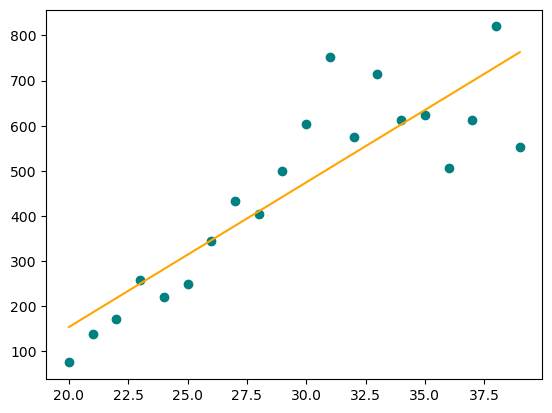

In [51]:
Xfit = treated_df['index_col']
Xfit = sm.add_constant(Xfit)
yfit = est.predict(Xfit)
Xfit = np.squeeze(np.asarray(Xfit))
X = np.squeeze(np.asarray(X))
plt.scatter(X[:,1],y,color='teal')
plt.plot(Xfit[:,1],yfit,c='orange')
plt.show()

### Polynomial regression for  post-lockdown cases

In [52]:
X2 = treated_df['index_col']
X2 = sm.add_constant(X2)
X2 = np.squeeze(np.asarray(X2))
X2 = np.concatenate([X2, np.square(X2[:,1]).reshape(20,1)],axis=1)
y2 = treated_df['num_cases']
est = sm.OLS(y2,X2).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     49.69
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           7.92e-08
Time:                        10:40:34   Log-Likelihood:                -116.22
No. Observations:                  20   AIC:                             238.4
Df Residuals:                      17   BIC:                             241.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2269.8632    563.059     -4.031      0.001   -3457.813   -1081.913
x1           157.6875     39.179      4.025      0.001      75.028     240.347
x2            -2.1291      0.662     -3.218      0.005      -3.525      -0.733
==============================================================================
Omnibus:                        2.658   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                1.533
Skew:                           0.676   Prob(JB):                        0.465
Kurtosis:                       3.106   Cond. No.                     2.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

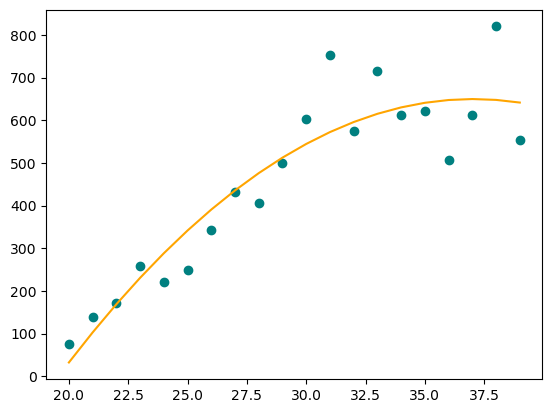

In [53]:
Xfit2 = treated_df['index_col']
Xfit2 = sm.add_constant(Xfit2)
Xfit2 = np.squeeze(np.asarray(Xfit2))
Xfit2 = np.concatenate([Xfit2, np.square(Xfit2[:,1]).reshape(20,1)],axis=1)
yfit2 = est.predict(Xfit2)
X2 = np.squeeze(np.asarray(X2))
plt.scatter(X2[:,1],y2,color='teal')
plt.plot(Xfit2[:,1],yfit2,c='orange')
plt.show()

### Measure of causal effect of lockdown

In [54]:
X = truncated_df['treated']
X = sm.add_constant(X)
y = truncated_df['num_cases']
est = sm.OLS(y,X).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     87.61
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.08e-11
Time:                        10:40:38   Log-Likelihood:                -257.10
No. Observations:                  40   AIC:                             518.2
Df Residuals:                      38   BIC:                             521.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7000     34.343      0.108      0.915     -65.824      73.224
treated      454.6000     48.568      9.360      0.000     356.278     552.922
==============================================================================
Omnibus:                        2.798   Durbin-Watson:                   0.515
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.724
Skew:                          -0.281   Prob(JB):                        0.422
Kurtosis:                       3.848   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estimated effect of lockdown measures
#### The coefficient 454.60 represents the causal effect of the lockdown, with a p-value near 0 and under 0.05 of 2.08e-11.

In [55]:
pval = est.pvalues["treated"]
print("P-value:", pval)

P-value: 2.0763874916193378e-11


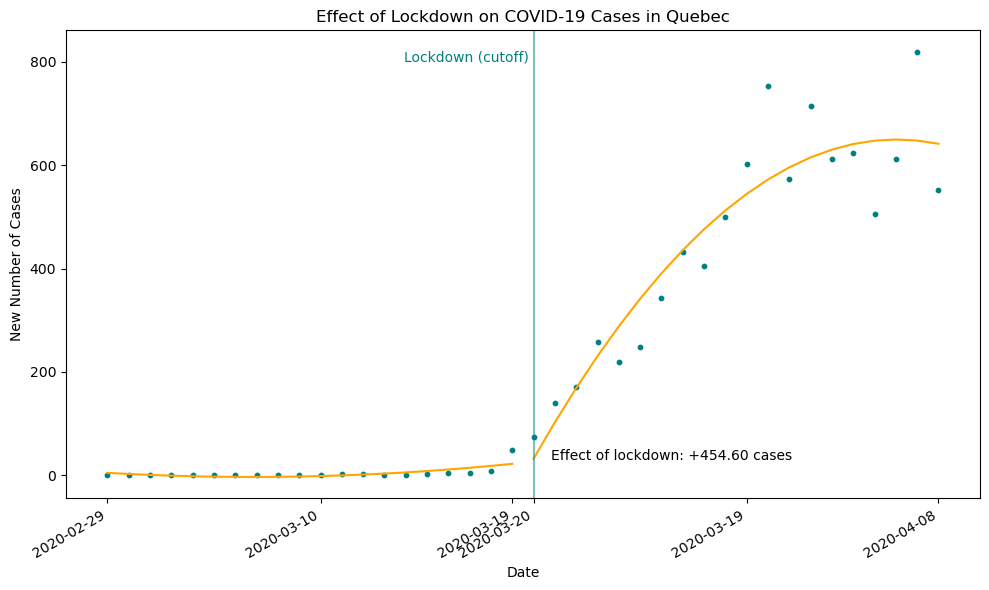

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X1[:,1],y1,color='teal',s=10)
ax.plot(Xfit1[:,1],yfit1,c='orange')
ax.scatter(X2[:,1],y2,color='teal',s=10)
ax.plot(Xfit2[:,1],yfit2,c='orange')
ax.set_title('Effect of Lockdown on COVID-19 Cases in Quebec')
ax.set_ylabel('New Number of Cases')
ax.set_xlabel('Date')
ax.set_xticks([0,10,19,20,30,39])
ax.set_xticklabels(['2020-02-29','2020-03-10','2020-03-19','2020-03-20','2020-03-19','2020-04-08'])
ax.text(20.8,30,'Effect of lockdown: +454.60 cases',fontsize=10,horizontalalignment='left')
ax.text(19.8,800,'Lockdown (cutoff)',fontsize=10,horizontalalignment='right',color='teal')
ax.axvline(20,0,3,color='teal',alpha=0.5)
fig.autofmt_xdate()
fig.tight_layout()

### P-value interpretation
The coefficient for the effect the lockdown on treated cases as opposed to untreated shows an estimated increase of around 454 cases after the lockdown, with a statistically significant p-value of 2.08e-11. The p-value is under our alpha level of 0.05 and we can therefore reject the null hypothesis that the lockdown has no significant effect on the number of cases observed. This then means that there is a significant effect of the lockdown on the number of cases observed and that this effect is positive, or rather an increase in the number of cases.

### Justification for regression design
In this regression analysis, we have included 20 samples, or days both before and after the cutoff. The reason for this is that it is a number that allows us to have a good amount of data to perform an accurate regression without skewing too much towards 0 since the number of cases stays at 0 for nearly two months. Not having too high of a sample number also allows an accurate interpretation of the effect of the lockdown on the number of cases because we are interested in the samples around the cutoff as in the 20/03/2020 lockdown. This is then just enough data to work with an perform an accurate analysis while still focusing on data surrounding the event we want to study.

The polynomial degree chosen is the second degree polynomial regression, because it gives us higher R-squared values and lower values of AIC and BIC, allowing for a better fit of the model to the data. In the pre-lockdown cases, the R-squared value jumps from 0.260 to 0.500 from the linear to the second degree polynomial regression, and the AIC and BIC levels are reduced from 148.3 and 150.3 to 142.4 and 145.4 respectively. In the post-lockdown cases the R-squared increases from 0.765 to 0.854 from the linear to the second degree polynomial regression, and the AIC and BIC levels are reduced from 246.0 and 248.0 to 238.4 and 241.4 respectively.

### Findings for the 20/03/2020 lockdown
In this regression analysis of the effect of the lockdown on the number of new COVID-19 cases in Quebec, we have found that the lockdown has actually had a positive effect on the new number of cases, with an estimated increase of around 455 new cases after the lockdown event. This is the opposite intention of the effect of the lockdown, since it was an attempt at reducing the number of erupting cases observed in the population of Quebec. As we have observed data surrounding the event of the lockdown, with 20 days preceding and following the event, the coefficient of the effect of the 'treated', or post-lockdown cases, as opposed to 'untreated' or pre-lockdown cases, is of 454.60 which indicates an average increase in cases in spite of the measures taken to try and reduce the number of cases with the lockdown.

The variables in our analysis were in fact the number of new cases as our y or dependant variable, and the days as our x or independant variable. The reason for this is that the goal of the regression analysis was to observe the effect of the lockdown event on new cases as opposed to total cases, in order to allow us to gauge the effect of the lockdown on new cases breaking out within the population of Quebec. It follows our findings on the effect of the lockdown on the number of cases show that the event has had an increase on the new number of cases detected within the population, in a day by day context.